REEF DAMAGE REACTION ANALYSIS
	
Analyzing bleaching records globally from 1963 to 2012 to identify when events have happened that damage coral reefs and attempt to correlate the resultant response in the media and by individuals using available data sources. 


In [28]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from bubbly.bubbly import bubbleplot

# to imbed plots, prevents pop-ups windows for plots
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]

In [29]:
# Read CSV and store reef information into Pandas Data Frames-- low memory required to suppress errors about mixed data types
coral_bleach_df = pd.read_csv('CoralBleaching.csv', encoding='iso-8859-1', low_memory=False)

In [30]:
coral_bleach_df.head(5)

,ID,REGION,SUBREGION,COUNTRY,LOCATION,LAT,LON,MONTH,YEAR,DEPTH,...,RECOVERY_CODE,RECOVERY,SURVEY_TYPE,SURVEY_AREA,WATER_TEMPERATURE,OTHER_FACTORS,REMARKS,SOURCE,REFERENCE_CODE,COUNTRY_CODE
0,7067,NaN,NaN,France,"Hermitage, Reunion",-21.22,55.22,4.0,2008,6,...,NaN,NaN,Reef Check Protocol,NaN,NaN,NaN,0% of recorded Recently killed coral on substr...,"Reef Check, Submitted by Harold Cambert. Site ...",NaN,FRA
1,7068,NaN,NaN,France,"Saint Gilles, Reunion",-21.05,55.23,7.0,2008,6.5,...,NaN,NaN,Reef Check Protocol,NaN,NaN,NaN,0% of recorded Recently killed coral on substr...,"Reef Check, Submitted by Harold Cambert. Site ...",NaN,FRA
2,7069,NaN,NaN,France,"Saint-Leu, Reunion",-21.16,55.28,2.0,2008,6,...,NaN,NaN,Reef Check Protocol,NaN,NaN,NaN,0% of recorded Recently killed coral on substr...,"Reef Check, Submitted by Harold Cambert . Site...",NaN,FRA
3,4024,NaN,NaN,France,SE France,43.00,5.00,8.0,1999,NaN,...,NaN,NaN,Diving,100 km,22-23.9 °C,NaN,Bleaching of Cladocora caespitosa and Oculina ...,Martin Pêcheux (martin-pecheux@wanadoo.fr) per...,NaN,FRA
4,7049,NaN,NaN,Macau,"Koh Tao, Surat Thani",10.12,99.81,7.0,2009,4,...,NaN,NaN,Reef Check Protocol,NaN,"Air temp 28 Deg C, Water temp 29 Deg C",NaN,0% of recorded recently killed coral on substr...,Reef check submitted by Suchana Apple Chavanic...,NaN,MAC


In [31]:
# Remove No bleaching event from the dataset from Bleaching severity column
bleaching = coral_bleach_df.loc[coral_bleach_df['BLEACHING_SEVERITY'] != 'No Bleaching']

print(coral_bleach_df.shape)
print(bleaching.shape)

(6190, 28)
(4713, 28)


In [32]:
# Remove all the data prior to 1990
bleaching_df = bleaching.loc[bleaching["YEAR"] >= 1990]

In [33]:
# Create a group based on the severity in "Bleaching_Severity" columns
bleaching_group = bleaching_df.groupby('BLEACHING_SEVERITY')

# Count how many times each bleaching appears in the group
count_bleaching = bleaching_group['BLEACHING_SEVERITY'].count()

# Converts first character of the index word to uppercase and remaining to lowercase
count_bleaching.index = count_bleaching.index.str.title()

count_bleaching

BLEACHING_SEVERITY
High                1135
Low                 1414
Medium               899
Severity Unknown    1069
Name: BLEACHING_SEVERITY, dtype: int64

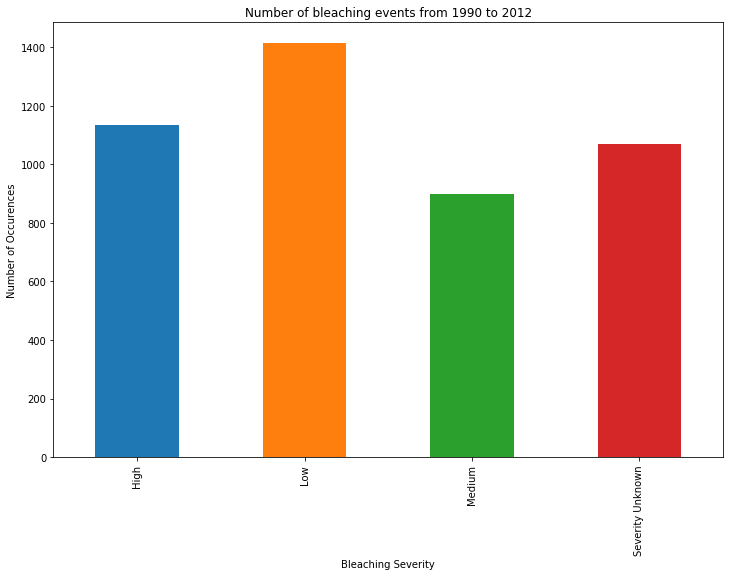

In [36]:
# Create a bar chart based off of the group series
count_chart = count_bleaching.plot(kind='bar')

# Set the xlabel and ylabel
count_chart.set_title("Number of bleaching events from 1990 to 2012")
count_chart.set_xlabel("Bleaching Severity")
count_chart.set_ylabel("Number of Occurences")

# Save the file
plt.savefig("Number_of_bleaching_events_from_1990_2012.png")

plt.show()


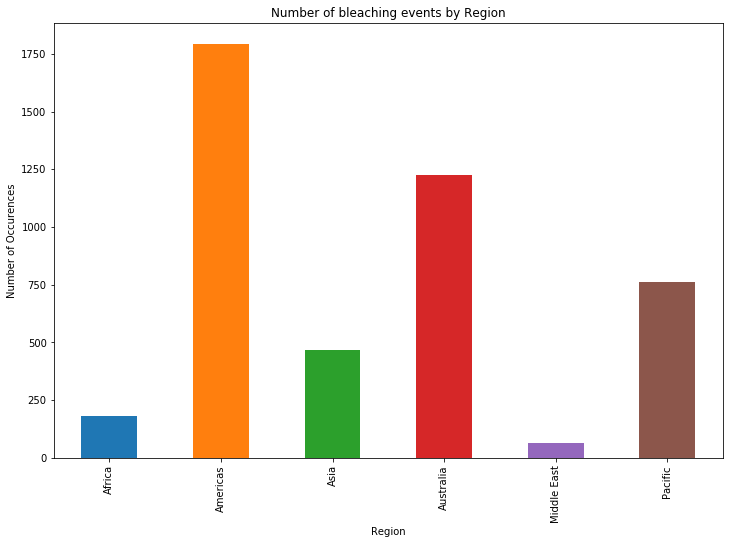

In [37]:
# Split up our data into groups based upon 'region'
region_group = bleaching_df.groupby('REGION')

# Find out how many of each region has the most bleaching occurence
region_bleaching = region_group["BLEACHING_SEVERITY"].count()

# Chart our data
region_chart = region_bleaching.plot(kind='bar', title="Number of bleaching events by Region")
region_chart.set_xlabel("Region")
region_chart.set_ylabel("Number of Occurences")

# Save the file
plt.savefig("Number_of_bleaching_events_by_Region.png")

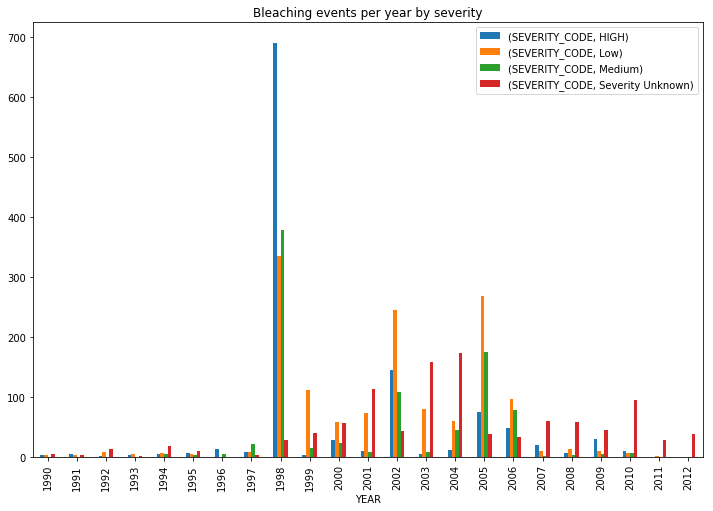

In [45]:
# Visualization of Bleaching occurence by severity code from 1990 to 2012

year_grouped = bleaching_df.groupby(["YEAR", "BLEACHING_SEVERITY"]).count()["SEVERITY_CODE"]

year_sorted_df = pd.DataFrame(year_grouped)

#Fill the NAN where no incidence was reported by zero
sorted_unstack = year_sorted_df.unstack().fillna(0)
sorted_unstack = sorted_unstack.sort_values("YEAR", ascending=True)

# Plotting bleaching events per year
sorted_unstack.plot(kind='bar', title="Bleaching events per year by severity")
plt.legend(loc='best')

# Save the file
plt.savefig("Bleaching_events_per_year_by_severity.png")

plt.show()


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F864575F98>,
      dtype=object)

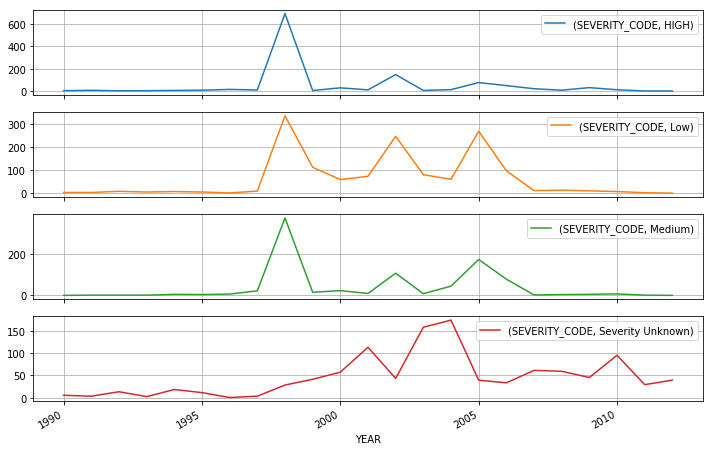

In [46]:
# Visualization of Bleaching occurence by severity code using subplots

grouped_df = pd.DataFrame(year_grouped)

grouped_unstack = grouped_df.unstack().fillna(0)

# Plot incidence of coral bleaching per year based on severity code
grouped_unstack.plot(subplots=True, grid=True)